In [1]:
import numpy as np
import yfinance as yf
import requests

import matplotlib.pyplot as plt

In [2]:
def get_historical_data(symbol, period="5min"):
    
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={period}&outputsize=full&apikey=XQJSCNK7QEMWH6RZ"
    r = requests.get(url)
    data = r.json()
    
    return data

In [3]:
def remove_after_hour_data(data):
    
    dates_list = list(data['Time Series (5min)'].keys())
    bool_list = [(int(d.split(" ")[-1].split(":")[0]) < 16) and (int(d.split(" ")[-1].split(":")[0]) > 8) for d in dates_list]
    
    data_array = np.array(list(data['Time Series (5min)'].values()))[bool_list]
    date_array = np.array(list(data['Time Series (5min)'].keys()))[bool_list]
    
    return date_array, data_array

In [4]:
def split_data_by_day(date_array, data_array):
    
    days = np.array([d.split(" ")[0] for d in date_array])
    unique_days = np.unique(days)
    
    list_data_per_day = []
    for d in unique_days:
    
        mask = days == d

        daily_data = data_array[mask]
        
        daily_data = [(float(d['2. high']) + float(d['3. low']))/2 for d in daily_data]

        list_data_per_day.append(daily_data)
        
    return list_data_per_day

In [5]:
data = get_historical_data("RKLB")

In [6]:
date_array, data_array = remove_after_hour_data(data)

In [7]:
list_data_per_day = split_data_by_day(date_array, data_array)

[(23, 15.455)]


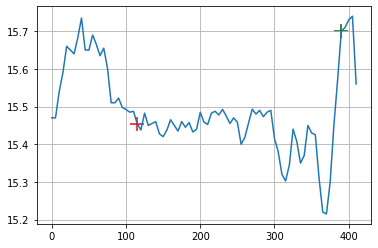

[(17, 15.128499999999999), (49, 15.08)]


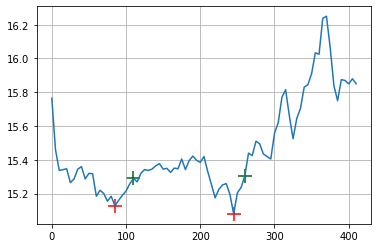

[(0, 15.3025)]


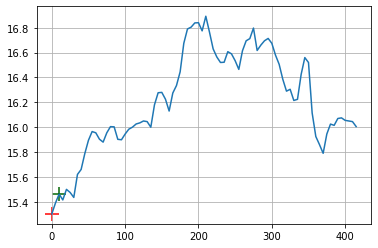

[(17, 14.55), (52, 14.504999999999999)]


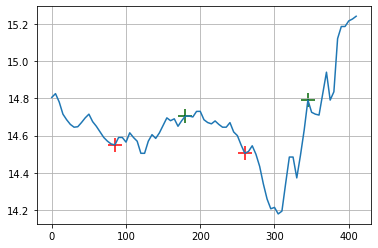

[(16, 12.754999999999999)]


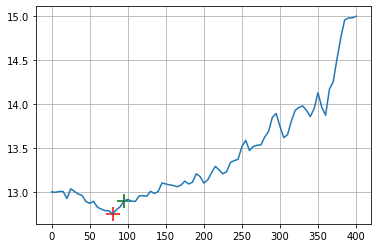

[(1, 12.265), (74, 12.235)]


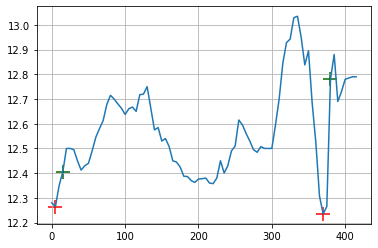

[(0, 12.785), (69, 12.6996)]


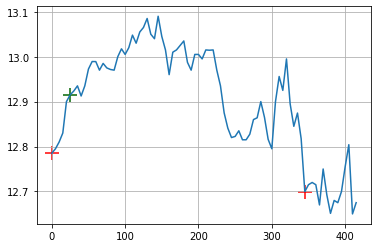

[(0, 12.945), (59, 12.945)]


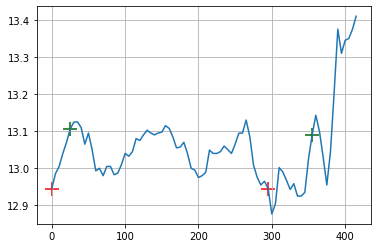

[(6, 12.45)]


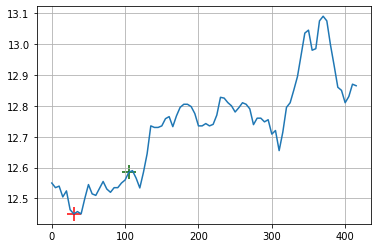

[(16, 12.6525), (28, 12.645), (73, 12.60505), (77, 12.515)]


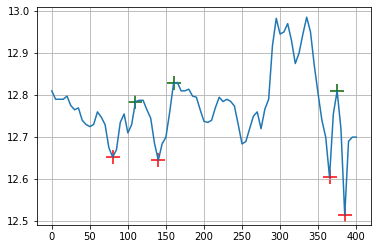

[(23, 11.71)]


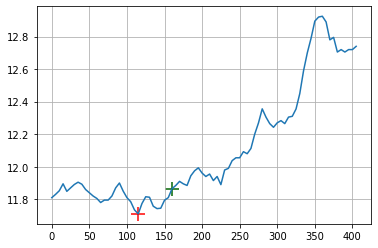

[(23, 12.465), (56, 12.4413), (70, 12.44)]


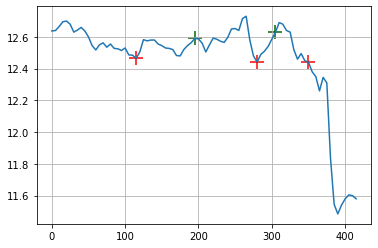

[(22, 12.38855)]


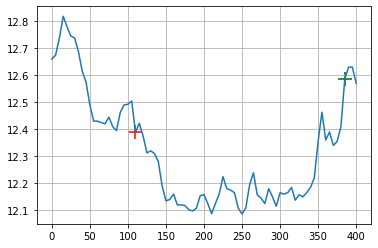

[(9, 12.27)]


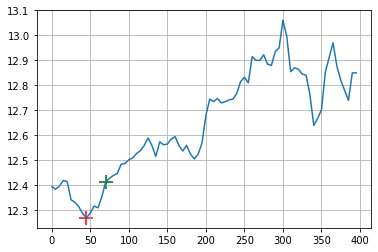

[(0, 12.225000000000001), (61, 12.225)]


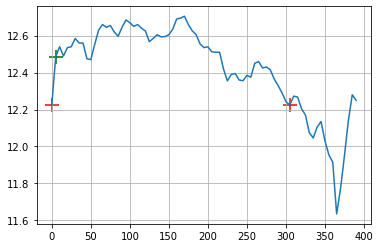

[(22, 11.812999999999999), (73, 11.700849999999999)]


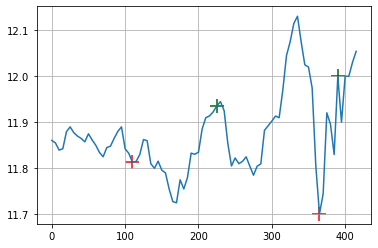

[(2, 12.107500000000002), (53, 12.105)]


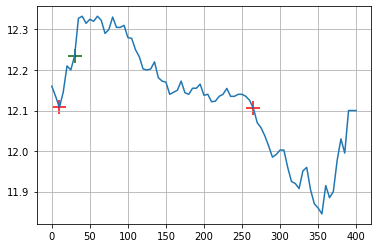

[(21, 12.23), (60, 12.2105)]


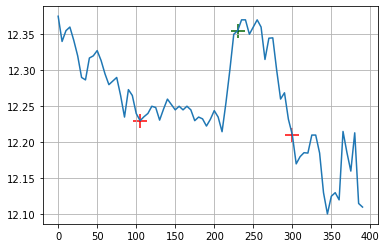

[(8, 11.93), (47, 11.905000000000001)]


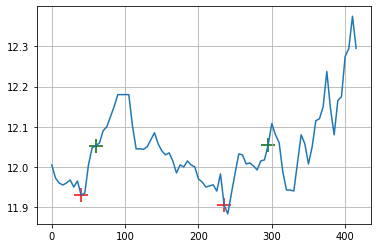

In [20]:
for d in list_data_per_day:
    
    min_first_hours = np.min(d[:24])
    argmin_first_hours = np.argmin(d[:24])
    global_minimum = min_first_hours
    
    sell_price = 0
    
    list_buy = []
    list_sell = []
    
    buy = True
    sell = False
    
    counter = argmin_first_hours
    for entry in d[argmin_first_hours:]:
        
        if entry < global_minimum:
            global_minimum = entry
        
        if entry <= global_minimum and buy:
            list_buy.append((counter, entry))
            
            buy = False
            sell = True
            
        if entry > min_first_hours*1.01 and sell:
            
            list_sell.append((counter, entry))
            
            buy = True
            sell = False
        
        counter += 1
    
    print(list_buy)
        
    
    plt.plot()
    plt.grid(True)
    plt.plot(np.arange(len(d))*5, d)
    plt.scatter(np.array([l[0] for l in list_buy])*5, [l[1] for l in list_buy], marker = "+", c = "red", s=200)
    plt.scatter(np.array([l[0] for l in list_sell])*5, [l[1] for l in list_sell], marker = "+", c = "darkgreen", s=200)
    plt.show()

15.469999999999999
15.265
15.3025
14.645
12.875
12.265
12.785
12.945
12.45
12.725000000000001
11.809999999999999
12.5449
12.43
12.27
12.225000000000001
11.839500000000001
12.107500000000002
12.2866
11.93
